In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('ggplot')  # or try 'classic', 'bmh', 'fivethirtyeight'

sns.set_palette('Set2')

In [2]:
df = pd.read_csv('../data/owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])

In [19]:
countries = ['Kenya', 'United States', 'India', 'Brazil']
df_countries = df[df['location'].isin(countries)]

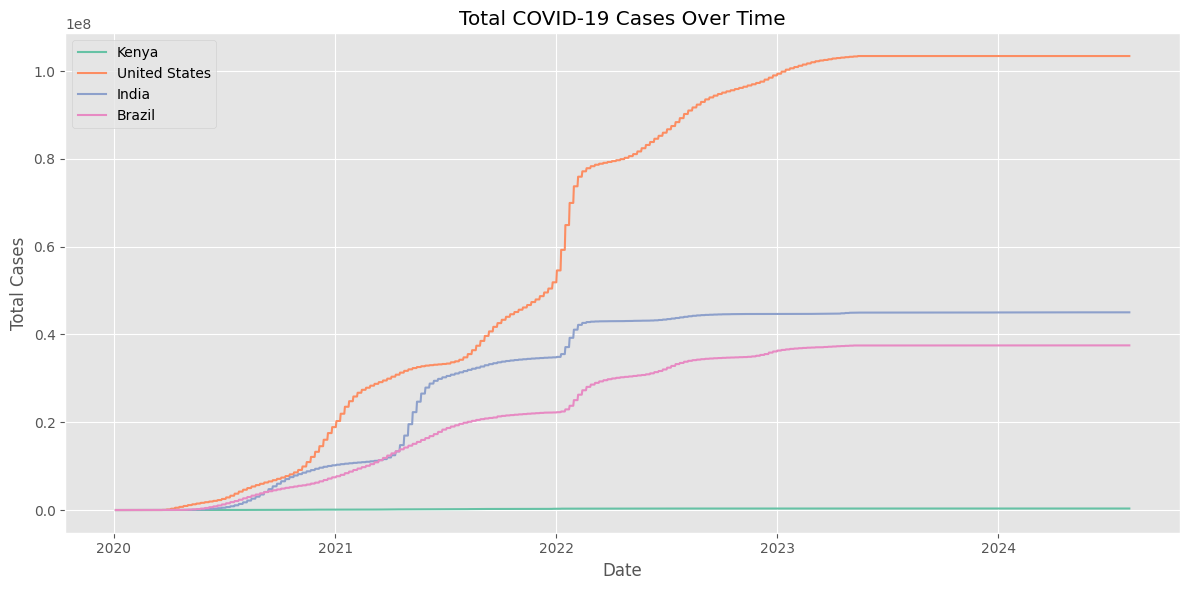

In [20]:
plt.figure(figsize=(12,6))
for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

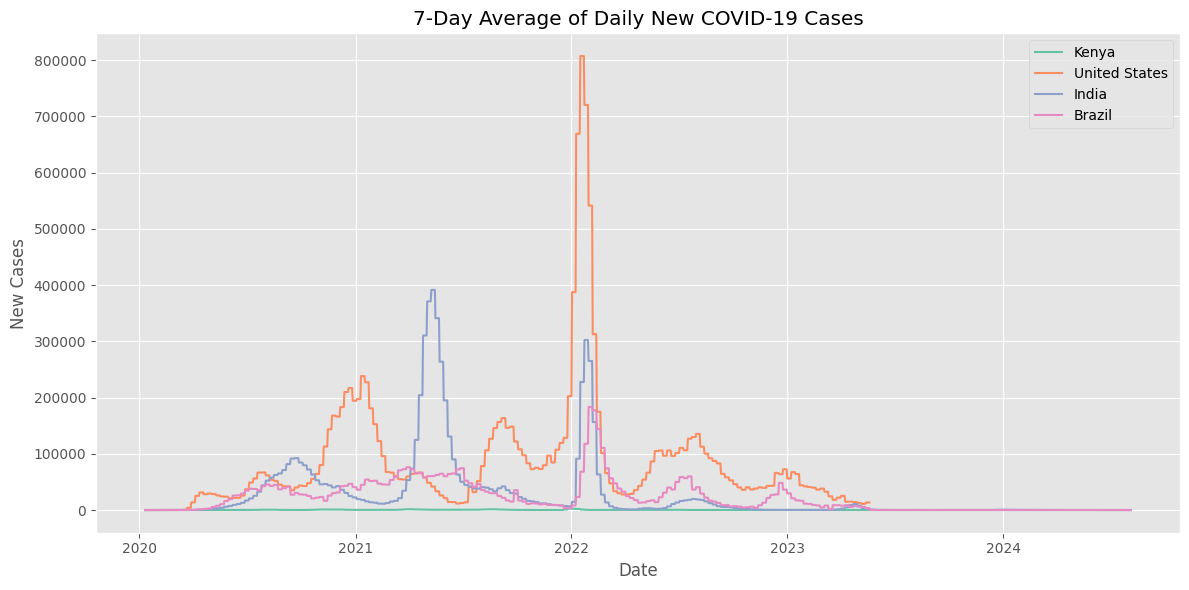

In [21]:
plt.figure(figsize=(12,6))
for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['new_cases'].rolling(7).mean(), label=country)
plt.title('7-Day Average of Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()

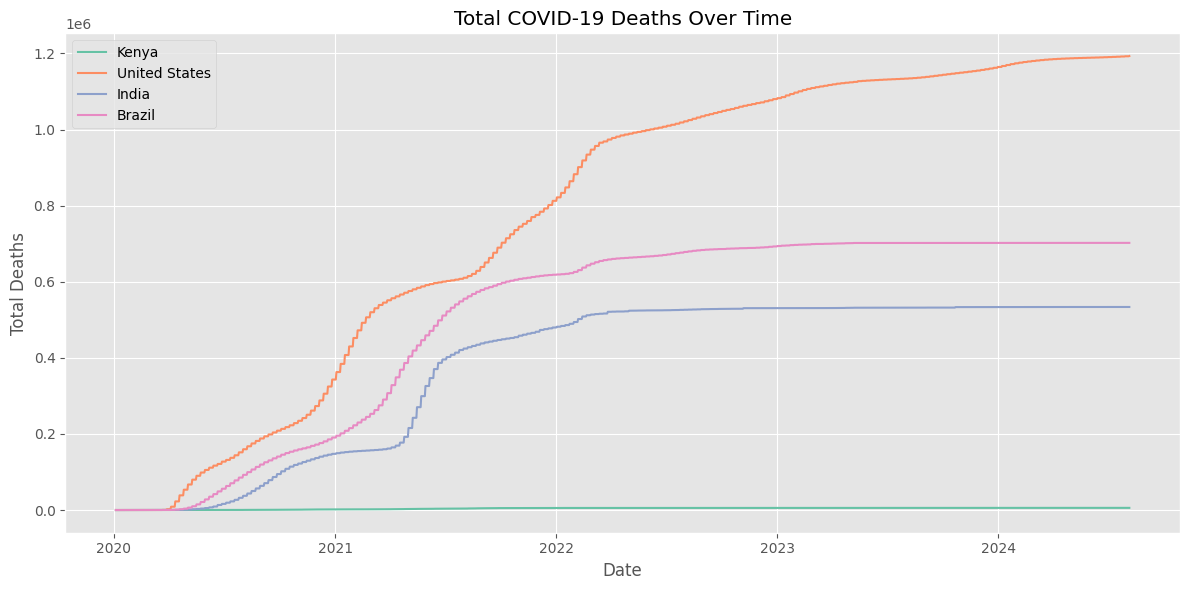

In [22]:
plt.figure(figsize=(12,6))
for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\KMC ADMIN\AppData\Local\Temp\ipykernel_6700\642804501.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



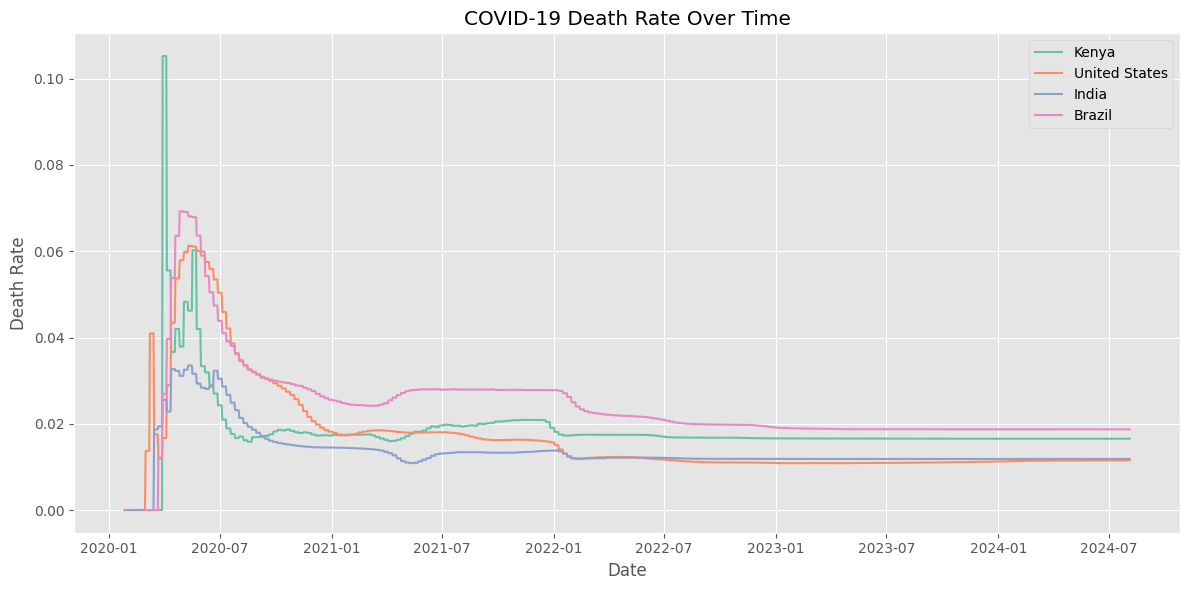

In [23]:
df_countries['death_rate'] = df_countries['total_deaths'] / df_countries['total_cases']
plt.figure(figsize=(12,6))
for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['death_rate'], label=country)
plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()

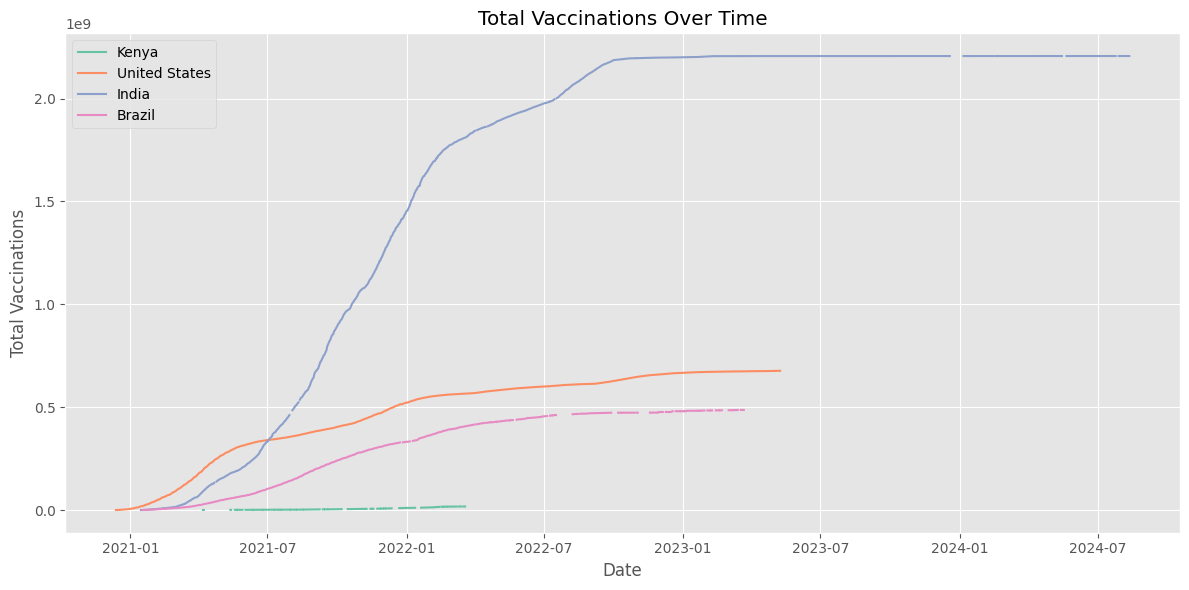

In [24]:
plt.figure(figsize=(12,6))
for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['total_vaccinations'], label=country)
plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\KMC ADMIN\AppData\Local\Temp\ipykernel_6700\4211971933.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



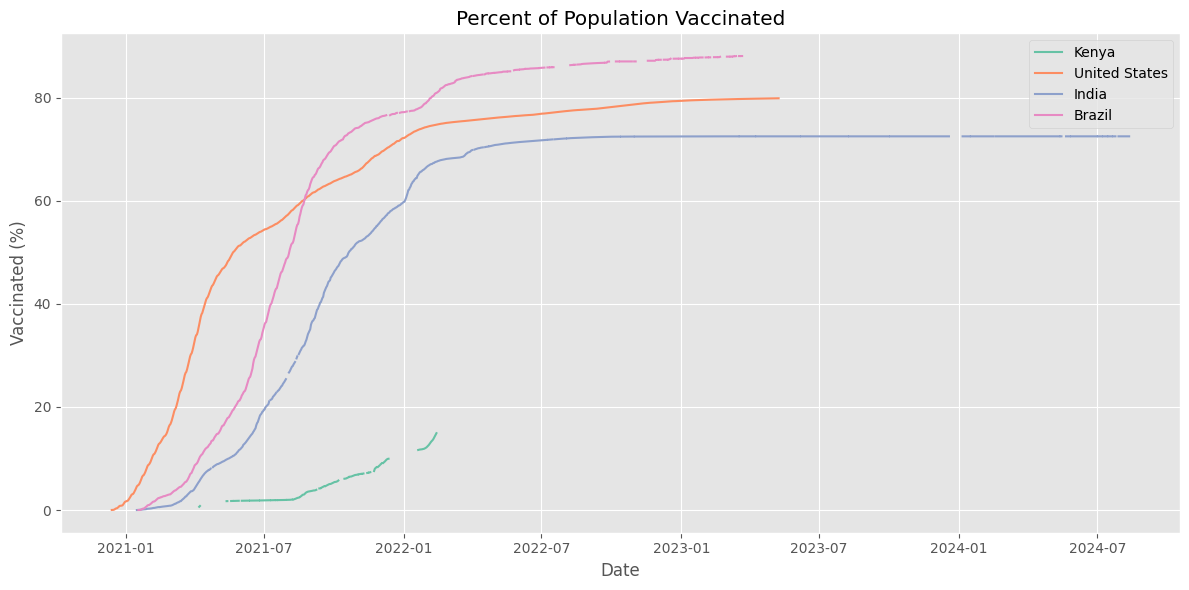

In [25]:
df_countries['percent_vaccinated'] = (df_countries['people_vaccinated'] / df_countries['population']) * 100
plt.figure(figsize=(12,6))
for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['percent_vaccinated'], label=country)
plt.title('Percent of Population Vaccinated')
plt.xlabel('Date')
plt.ylabel('Vaccinated (%)')
plt.legend()
plt.tight_layout()
plt.show()

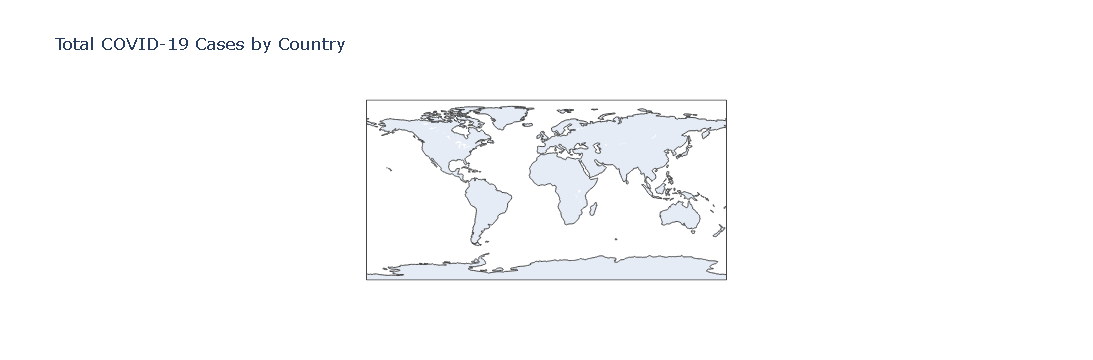

In [18]:
latest = df[df['date'] == df['date'].max()]
latest = latest[['iso_code', 'location', 'total_cases']].dropna()
fig = px.choropleth(latest, locations='iso_code',
                    color='total_cases',
                    hover_name='location',
                    color_continuous_scale='Reds',
                    title='Total COVID-19 Cases by Country')
fig.show()